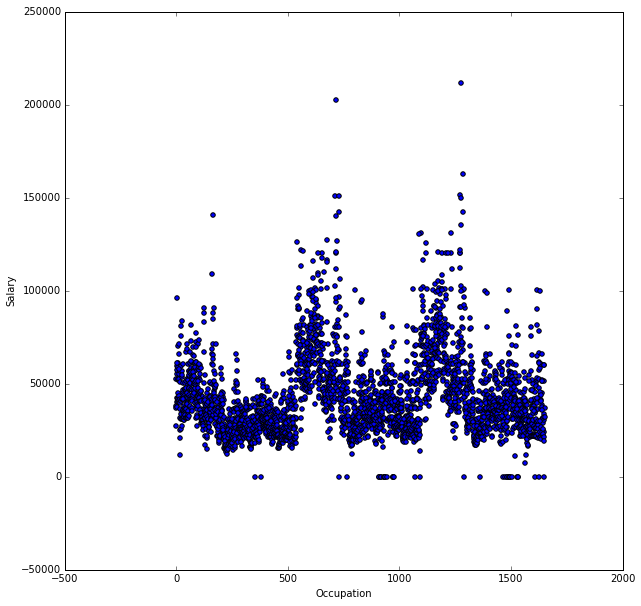

ImportError: No module named 'mpld3'

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
figure(figsize=(10,10))
# Take compiled_census.csv and extract each column to a separate list
# Column names: year, occupation, m_salary, f_salary, f_salary/m_salary
df = pd.read_csv('compiled_census.csv')

year = df.Year 
occupation = df.OccupationalCategory.tolist()
m_salary = df.Men.tolist()
f_salary = df.Women.tolist()
percentage = df.Percentage.tolist()

id_to_category = {} # {id : category}
category_to_occ = {} # {category : occupation}
index = 0
category = None
for i in range(len(occupation)):
    if (':' in occupation[i]):
        category = occupation[i]
        id_to_category[index] = category
        index += 1
    else:
        if category in category_to_occ.keys():
            category_to_occ[category].append(occupation[i])
        else:
            category_to_occ[category] = [occupation[i]]

plt.scatter(list(range(len(m_salary))), m_salary)
plt.scatter(list(range(len(m_salary))), f_salary)
plt.ylabel('Salary')
plt.xlabel('Occupation')
plt.show()

import mpld3
labels = 
tooltip = mpld3.plugins.PointLabelTooltip(plt, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.show()
